Name    : <br>
NIM     :

Algoritma Firefly adalah salah satu metode optimasi berbasis populasi yang terinspirasi dari perilaku alami dari kunang kunang. Algoritma Firefly bekerja sebagai berikut:

- Inisialisasi: Algoritma ini dimulai dengan inisialisasi sejumlah kunang-kunang secara acak dalam sebuah tempat pencarian. Setiap kunang-kunang ini memiliki posisi yang merepresentasikan sebuah solusi potensial dalam tempat pencarian, dan setiap posisi memiliki nilai kecerahan yang terkait dengan kualitas solusi tersebut (biasanya kecerahan berbanding terbalik dengan nilai fungsi tujuan).

- Kecerahan atau Atraktivitas: Kecerahan kunang-kunang dianggap proporsional terhadap nilai kecocokan atau fitness dari solusi yang direpresentasikannya. Kecerahan ini juga menentukan daya tarik kunang-kunang tersebut terhadap kunang-kunang lain. Dalam konteks optimasi, kunang-kunang yang lebih terang memiliki solusi yang lebih baik dan lebih menarik bagi yang lain.

- Pergerakan Kunang-Kunang: Kunang-kunang yang kurang terang akan bergerak menuju kunang-kunang yang lebih terang berdasarkan daya tariknya, yang biasanya berkurang dengan bertambahnya jarak antar kunang-kunang. Gerakan ini dihitung menggunakan rumus khusus yang menggabungkan atraksi dan komponen pergerakan acak.

- Pembaruan Posisi: Posisi setiap kunang-kunang diperbarui berdasarkan atraksinya kepada kunang-kunang lain yang lebih terang. Rumusnya bisa mencakup komponen eksplorasi acak, yang biasanya diimplementasikan sebagai variabel yang mengikuti distribusi normal atau seragam.

- Iterasi: Langkah-langkah di atas diulang untuk sejumlah iterasi yang ditentukan atau sampai kriteria berhenti terpenuhi (seperti konvergensi pada solusi atau mencapai batas maksimum iterasi).

- Evaluasi Solusi: Pada akhir iterasi, solusi terbaik yang ditemukan oleh kunang-kunang (yaitu, posisi kunang-kunang dengan kecerahan tertinggi) akan diambil sebagai solusi optimal.



# Instal Library

In [1]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


# Fungsi F16

Fungsi F16 didapat kan dari <br>

https://www.mathworks.com/matlabcentral/fileexchange/125645-drawing-code-for-mathematical-benchmark-functions

In [2]:
def f16(x1, x2):
    return 4*x1**2 - 2.1*x1**4 + (1/3)*x1**6 + x1*x2 - 4*x2**2 + 4*x2**4

# Kode

## Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import math

## Parameter

Parameter di dalam firefly algorithm ada berapa jenis seperti yang dijelaskan di bawah ini

In [4]:
# Parameter Firefly Algorithm
n = 100  # Jumlah kunang-kunang dalam 1 populasi
max_iter = 200 # Jumlah iterasi
alpha = 0.1  # Mengontrol parameter randomness dalam pegerakan kunang kunang
gamma = 1 # Seberapa terang cahaya/penyerapan cahaya antar kunang kunang
beta_init = 1  # Mengontrol seberapa tinggi daya tarik antar kunang kunang

## Inisialisasi Populasi

Ada beberapa baris kode yang akan di implemetasi sebagai Inisialisi Populasi. <br>

1. np.random.seed berguna untuk memastikan bilangan acak setidaknya dapat di replikasi karena memiliki seed yang sama
2. Array untuk menyimpan para kunang kunang
3. Menghitung fitness fireflies itu sendiri

In [5]:
np.random.seed(42) # Memastikan bilangan acak dapat di replikasi
fireflies = np.random.uniform(-0.7, 0.7, (n, 2)) # Menghasilkan array n*2 dengan range -0.7 , 0.7
fitness = f16(fireflies[:, 0], fireflies[:, 1]) 
# Memanggi fungsi F16 dan memasukan x1 dan x2, fireflies[:,0] merupakan array berisi hasil x1 dan fireflies [:,1] merupakan array berisi hasil x2.

In [6]:
# Simpan data untuk animasi
history = []
# Track the best solution found
best_position = None
best_fitness = np.inf 
best_firefly_index = np.argmin(fitness)

## Firefly Algorithm

Firefly Algorithm adalah algoritma yang diilhami oleh perilaku kunang-kunang. Prinsip utamanya adalah bahwa kunang-kunang akan tertarik pada cahaya yang lebih terang, dan mereka bergerak menuju kunang-kunang yang lebih terang.

In [7]:
for t in range(max_iter): # Iterasi dalam firefly algorithm
    history.append(fireflies.copy()) # Kebutuhan animasi
    for i in range(n):
        for j in range(n):
            if fitness[i] > fitness[j]: # Akan memeriksa apakah kunang kunang 'i' lebih besar dari 'j'. Apabila benar maka posisi kunang kunang 'i' akan di perbaharui mendekati 'j'
                r = math.dist(fireflies[i],fireflies[j]) #Menghitung Euclidean distance antar kunang kunang
                beta = beta_init * np.exp(-gamma * r) # Menghitung beta ini bisa dilakukan dengan r atau r^2 
                fireflies[i] = fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(2) - 0.5) # Posisi kunang kunang diperbaharui
                fireflies[i] = np.clip(fireflies[i], -0.7, 0.7) # Membatasi kunang kunang dalam -0.7 dan 0.7
                fitness[i] = f16(fireflies[i, 0], fireflies[i, 1]) # Fitness Update
                                # Update the best solution found
                if fitness[i] < best_fitness:
                    best_fitness = fitness[i]
                    best_position = fireflies[i].copy()
                    print("NEW BEST",best_position)
                    

history.append(fireflies.copy())

NEW BEST [-0.07849435  0.24515446]
NEW BEST [ 0.04590689 -0.34599255]
NEW BEST [-0.07311355 -0.48490294]
NEW BEST [ 0.14427237 -0.60984701]
NEW BEST [ 0.08693669 -0.6137867 ]
NEW BEST [ 0.12616434 -0.62738736]
NEW BEST [ 0.13595935 -0.66888313]
NEW BEST [ 0.10067434 -0.69212507]
NEW BEST [ 0.10092832 -0.69503961]
NEW BEST [ 0.08669149 -0.7       ]
NEW BEST [ 0.08721064 -0.7       ]
NEW BEST [ 0.08843299 -0.7       ]
NEW BEST [ 0.08826353 -0.7       ]
NEW BEST [ 0.08817568 -0.7       ]
NEW BEST [ 0.08823645 -0.7       ]
NEW BEST [ 0.08822944 -0.7       ]
NEW BEST [ 0.08822062 -0.7       ]
NEW BEST [ 0.08822007 -0.7       ]
NEW BEST [ 0.08821997 -0.7       ]
NEW BEST [ 0.08821948 -0.7       ]


## Buat GIF dari data yang telah ada

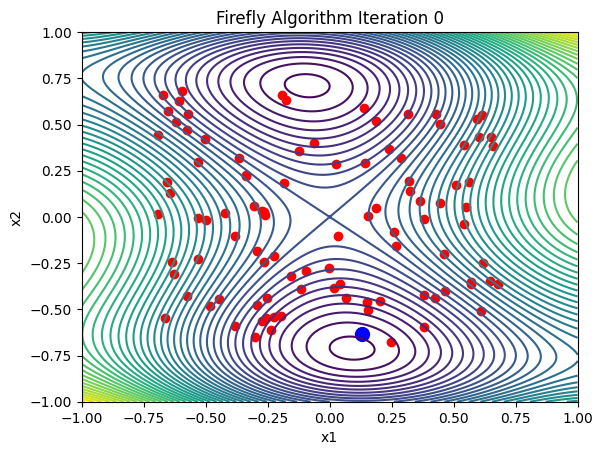

In [8]:
# Plot hasil dan animasi
X1 = np.linspace(-1, 1, 400)
X2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = f16(X1, X2)

fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter(fireflies[:, 0], fireflies[:, 1], c='red')

def update(frame):
    global best_firefly_index  # Access to the global best_firefly_index if needed
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    fireflies_this_frame = history[frame]
    ax.scatter(fireflies_this_frame[:, 0], fireflies_this_frame[:, 1], c='red')
    # Update the best position if necessary, here assumed to still be valid
    ax.scatter(fireflies_this_frame[best_firefly_index, 0], fireflies_this_frame[best_firefly_index, 1], c='blue', s=100)
    ax.set_title(f'Firefly Algorithm Iteration {frame}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False) # type: ignore

# Simpan animasi sebagai GIF
ani.save("firefly_1.gif", writer="pillow",fps=3)

In [9]:
# Output the best solution found
print("Best position:", best_position)
print("Best fitness:", best_fitness)

Best position: [ 0.08821948 -0.7       ]
Best fitness: -1.0303499693790377
